<h1 align='center' style="color: blue;">Assignment #3</h1>

<p><b>Question #1</b>
    <ol>
        <li>Download the diabetes.csv dataset from the Canvas and use <b>read_csv( )</b> to read it.</li>
        <li>Use <u>Decision Tree</u> to create a prediction model:</li>
        <ul>
            <li>Use grid search to find the depth of tree (try values between 2-8)</li>
            <li>Use 5-fold stratified cross validation in your work.</li> 
            <li><b>Outcome</b> is your dependent variable</li>
            <li>Use all other features as independent variables</li>
        </ul>
        <li>Perform Additional Data Aanalysis:</li>
        <ul>
            <li>Use full dataset to create another predictive model using Decision Tree (use the best depth that you found in last step)</li>
            <li>What is the in-sample prediction accuracy?</li>
            <li>Find the feature importance.(How you can interpret it)</li>
        </ul>
        <li>Create three predction models using Logistic Regression, SVM, and Random Forest:</li>
        <ul>
            <li>Use 70% of data for tarining and consider 30% of data for testing. (Use <b style="color:red">random_state=0</b>)</li>
            <li> Report the out-sample accuracy for all models</li>
        </ul>
        <li>Compute Precision, Recall, F1 and AUC values for the prediction models in the last step. Which one has the best performance. (Write your logit for selection of the best model)</li>
        <li>Draw ROC Curve for Logistic Regression model</li>
    </ol>
            

In [8]:
# Write your answer here (part1)
import pandas as pd
import numpy as np
diabetes = pd.read_csv("./diabetes.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
# Write your answer here (part2)


from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score



X = diabetes.drop(['Outcome'], axis = 1)
y = diabetes.Outcome
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_test_hat = DT.predict(X_test)

param_grid = {'max_depth' : [2,3,4,5,6,7,8]}
GS = GridSearchCV(estimator=DT, param_grid=param_grid, cv= 5)
GS.fit(X_train, y_train)
print(GS.best_params_)
    


cv = StratifiedKFold(n_splits=4, random_state=0, shuffle=True)
Validation_score = cross_val_score(DT, X, y, cv=cv, scoring='accuracy')         

print("Cross Validation Scores for Decision Tree:",(Validation_score))
print("Mean Accuracy Score for Decision Tree:",(np.mean(Validation_score)))


score = accuracy_score(y_test,y_test_hat) * 100
print("Accuracy Score for Decision Tree:",(score))

{'max_depth': 4}
Cross Validation Scores for Decision Tree: [0.67708333 0.72916667 0.72916667 0.67708333]
Mean Accuracy Score for Decision Tree: 0.703125
Accuracy Score for Decision Tree: 71.875


In [10]:
# Write your answer here (part3)
X = diabetes.drop(['Outcome'], axis = 1)
y = diabetes.Outcome
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
DT1 = DecisionTreeClassifier(max_depth = 4)
DT1.fit(X_train, y_train)
y_test_hat = DT.predict(X_test)
y_train_hat  = DT1.predict(X_train)
y_test_hat  = DT1.predict(X_test)
accuracy_i = accuracy_score(y_train,y_train_hat, normalize = True) * 100
accuracy_o = accuracy_score(y_test,y_test_hat, normalize = True) * 100
print("In-sample Accuracy: ", accuracy_i)
print("Out-of-sample Accuracy: ", accuracy_o)
print("The feature importance is:",DT1.feature_importances_)
print("Features with higher values are considered more important than other features , feature importance is an important factor related to the decrease in the impurity of a node")
 

In-sample Accuracy:  77.95138888888889
Out-of-sample Accuracy:  74.47916666666666
The feature importance is: [0.03304574 0.57236263 0.02138085 0.02077932 0.         0.13650152
 0.04857059 0.16735935]
Features with higher values are considered more important than other features , feature importance is an important factor related to the decrease in the impurity of a node


In [12]:
# Write your answer here (part4)
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#Logistic Regression Model
LR = LogisticRegression()
X = diabetes.drop(['Outcome'], axis = 1)
y = diabetes.Outcome
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=0)
LR.fit(Xtrain, ytrain)
y_test_hat = LR.predict(Xtest)
y_test_hat  = LR.predict(Xtest)
LR_acc = accuracy_score(ytest,y_test_hat, normalize = True) * 100
print("Out-of-sample Accuracy for Logistic Regression:", LR_acc)


#Random Forest Model
X1 = diabetes.drop(['Outcome'], axis = 1)
y1 = diabetes.Outcome
X_train_, X_test_, y_train_, y_test_ = train_test_split(X1, y1, random_state=0)
RF = DecisionTreeClassifier(max_depth = 4)
RF.fit(X_train_, y_train_)
y_test_hat_  = RF.predict(X_test_)
RF_acc = accuracy_score(y_test_,y_test_hat_, normalize = True) * 100
print("Out-of-sample Accuracy for Random Forest:", RF_acc)

#SVM model
X2 = diabetes.drop(['Outcome'], axis = 1)
y2 = diabetes.Outcome
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3, random_state=0)
SVC = SVC(kernel = 'rbf', gamma='auto', C=1E10).fit(X2, y2)
y_test_hat = SVC.predict(X_test)
y_test_hat  = SVC.predict(X_test)
SVC_acc = accuracy_score(y_test,y_test_hat, normalize = True) * 100
print("Out-of-sample Accuracy for SVM:", SVC_acc)

C:\Users\Rohith\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Out-of-sample Accuracy for Logistic Regression: 77.92207792207793
Out-of-sample Accuracy for Random Forest: 74.47916666666666
Out-of-sample Accuracy for SVM: 100.0


In [13]:
# Write your answer here (part5)
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score

#Logistic Regression
print("Confusion Matrix for Logistic Regression: ")
print(confusion_matrix(ytest,y_test_hat))
print("Classification_report for Logistic Regression :")
print(classification_report(y_test,y_test_hat))
LR_AUC = roc_auc_score(ytest, LR.predict_proba(Xtest)[:,1]) 
print("AUC for Logistic Regression: {:.3f}".format(LR_AUC))

#Random Forest Classifier
print("\nConfusion Matrix for Random Forest: ")
print(confusion_matrix(y_test_,y_test_hat_))
print("Classification_report for Random Forest: ")
print(classification_report(y_test_,y_test_hat_))
RF_AUC = roc_auc_score(y_test_, RF.predict_proba(X_test_)[:,1]) 
print("AUC for Random Forest: {:.3f}".format(RF_AUC))

#SVM
print("\nConfusion Matrix for SVM")
print(confusion_matrix(y_test,y_test_hat))
print("Classification_report for SVM")
print(classification_report(y_test,y_test_hat))

Confusion Matrix for Logistic Regression: 
[[157   0]
 [  0  74]]
Classification_report for Logistic Regression :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00        74

    accuracy                           1.00       231
   macro avg       1.00      1.00      1.00       231
weighted avg       1.00      1.00      1.00       231

AUC for Logistic Regression: 0.836

Confusion Matrix for Random Forest: 
[[106  24]
 [ 25  37]]
Classification_report for Random Forest: 
              precision    recall  f1-score   support

           0       0.81      0.82      0.81       130
           1       0.61      0.60      0.60        62

    accuracy                           0.74       192
   macro avg       0.71      0.71      0.71       192
weighted avg       0.74      0.74      0.74       192

AUC for Random Forest: 0.802

Confusion Matrix for SVM
[[157   0]
 [  0  74]]
Classification_r

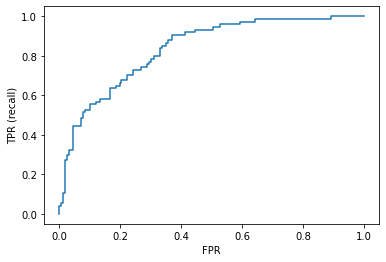

In [14]:
# Write your answer here (part6)
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(ytest, LR.predict_proba(Xtest)[:,1])
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)");

<p><b>Question #2</b>: Consider the following dataset 

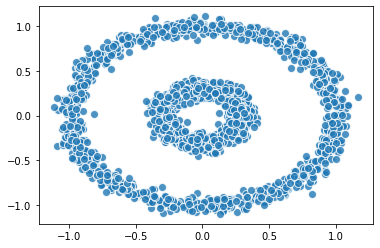

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
N_samples = 2000
X = np.array(datasets.make_circles(n_samples=N_samples,
                                   noise=0.05, factor=0.3)[0])    
plt.scatter(X[:,0], X[:,1], alpha=0.8, s=64, edgecolors='white');

<ol>
    <li>Use K-Means to cluster the points and visualize your result</li>
    <li>Use Spectral Clustering to cluster the points and visualize your result</li>
    <li>Use Agglomerative Clustering to cluster the points and visualize your result</li>
    <li>Use DBSCAN to cluster the points and visualize your result</li>
    <li>(optional) Use HDBSCAN to cluster the points and visualize your result</li>
</ol>

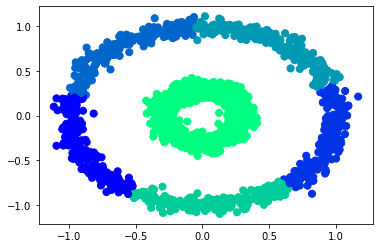

In [16]:
# Write your answer here (part1)

from sklearn.cluster import KMeans 
KMC = KMeans(n_clusters=6, random_state=0) 
KMC.fit(X)                            
y_KMC = KMC.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_KMC, s=50, cmap='winter');

C:\Users\Rohith\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


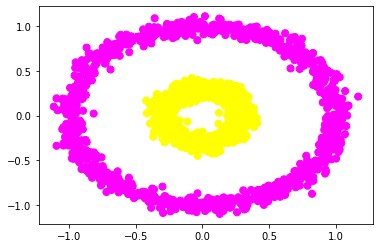

In [17]:
# Write your answer here (part2)
from sklearn.cluster import SpectralClustering 
SC = SpectralClustering(n_clusters=2,affinity='nearest_neighbors',assign_labels='kmeans',n_neighbors = 6)
labels = SC.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='spring');

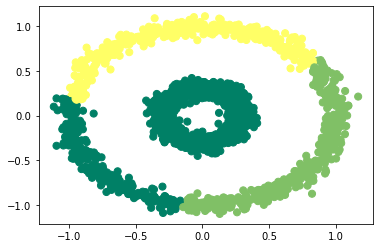

In [18]:
# Write your answer here (part3)
from sklearn.cluster import AgglomerativeClustering
AGG = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_agg = AGG.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_agg, s=50, cmap='summer');

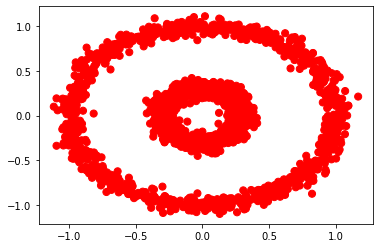

In [19]:
# Write your answer here (part4)
from sklearn.cluster import DBSCAN
DBS = DBSCAN(min_samples=3, eps=1.5)
y_dbscan = DBS.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, s=50, cmap='autumn');

In [20]:
# Write your answer here (part5)
import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=6)


<p><b>Question #3</b>: Consider the following image (<u>Download the France.jpg file from Canvas</u>)

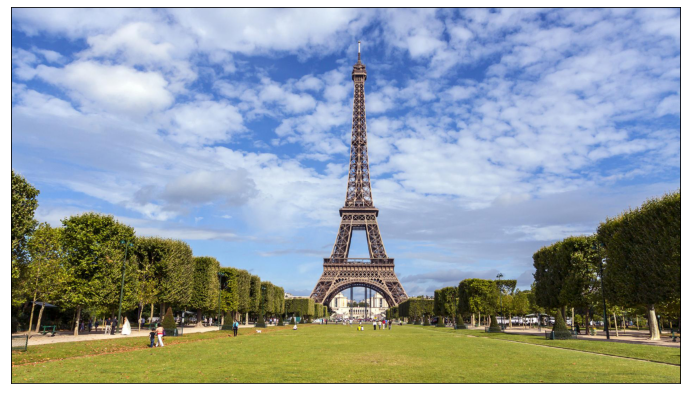

In [21]:
import matplotlib.image as mpimg
fig, ax = plt.subplots(figsize=(12, 18))
France = np.array(mpimg.imread('France.jpg'))
ax.imshow(France)
ax.set(xticks=[], yticks=[]);

<ol>
    <li>Reduce the number of colors to 64 and visualize the image (use K-Means)</li>
    <li>Reduce the number of colors to 16 and visualize the image (use K-Means)</li>
    <li>Reduce the number of colors to 8 and visualize the image (use K-Means)</li>
</ol>

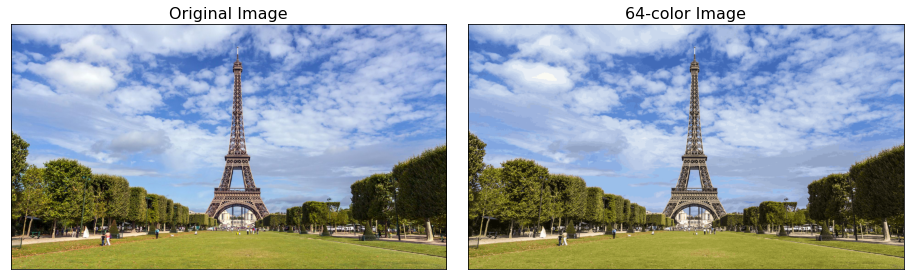

In [22]:
# Write your answer here (part1)
from sklearn.cluster import MiniBatchKMeans
data = France / 255.0
X = data.reshape(1068 * 1900, 3)
KM1 = MiniBatchKMeans(64)
KM1.fit(X)
KM1.cluster_centers_
y_KM1 = KM1.predict(X)
color_64 = KM1.cluster_centers_[y_KM1] 
New_France = color_64.reshape(France.shape)
New_France.shape
fig, ax = plt.subplots(1, 2, figsize=(16, 6),subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(France)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(New_France)
ax[1].set_title('64-color Image', size=16);

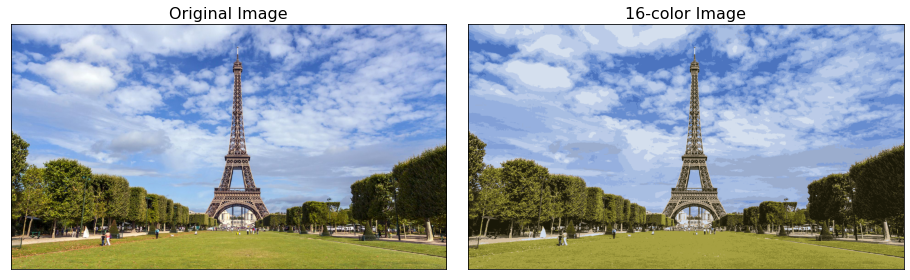

In [23]:
# Write your answer here (part2)
from sklearn.cluster import MiniBatchKMeans
KM2 = MiniBatchKMeans(16)
KM2.fit(X)
KM2.cluster_centers_
y_KM2 = KM2.predict(X)
color_16 = KM2.cluster_centers_[KM2.predict(X)]
NewFrance = color_16.reshape(France.shape)
fig, ax = plt.subplots(1, 2, figsize=(16, 6),subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(France)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(NewFrance)
ax[1].set_title('16-color Image', size=16);

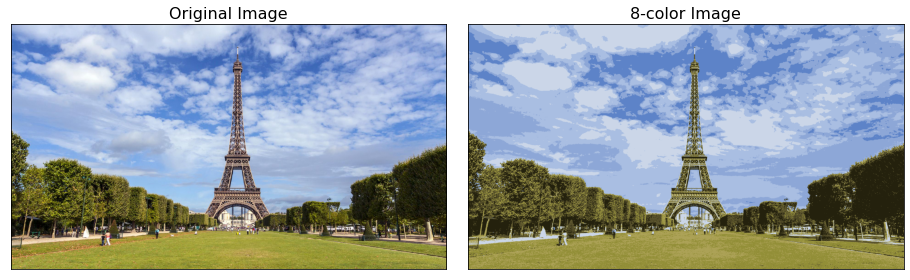

In [24]:
# Write your answer here (part3)
from sklearn.cluster import MiniBatchKMeans
KM3 = MiniBatchKMeans(8)
KM3.fit(X)
KM3.cluster_centers_
y_KM3 = KM3.predict(X)
color_8 = KM3.cluster_centers_[y_KM3]
FranceNew = color_8.reshape(France.shape)
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(France)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(FranceNew)
ax[1].set_title('8-color Image', size=16);

<p><b>Question #4</b>: The following code download images of top 200 players (<u>Download Fifa Data from Blackboard</u>)

In [25]:
from PIL import Image
import requests
from io import BytesIO
import pandas as pd

def read_image(url):
    response = requests.get(url)
    img = np.array(Image.open(BytesIO(response.content)).convert('RGB'))
    return img

FIFA20 = pd.read_csv("data.csv")
TOP_200_Players = FIFA20.sort_values(by = ['Overall'], ascending=False)[:200]
images =np.array([read_image(url) for url in TOP_200_Players.Photo])
player_names = np.array([Name for Name in TOP_200_Players.Name])
data = np.array([image.reshape(240*240*3) for image in images])

C:\Users\Rohith\anaconda3\lib\site-packages\PIL\Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [26]:
data.shape

(200, 172800)

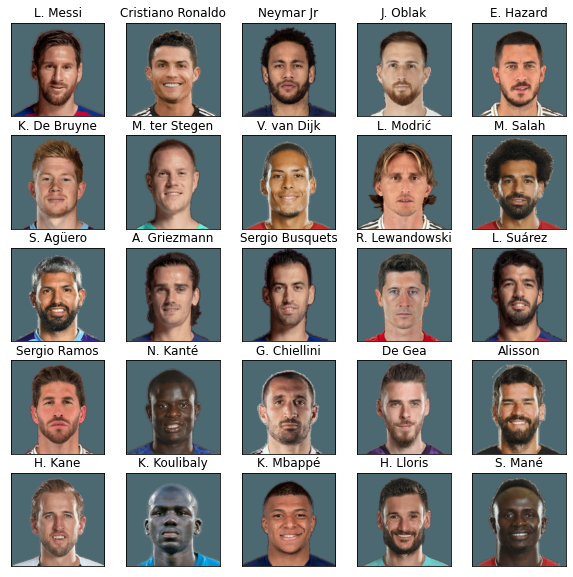

In [27]:
fig, ax = plt.subplots(5, 5, figsize=(10, 10)) 
for i, axi in enumerate(ax.flat):
    axi.imshow(images[i]) 
    axi.set_title(player_names[i]) 
    axi.set(xticks=[], yticks=[])

Here is some description about data
<ul>
    <li>images: contains 200 images of players. images.shape = (200, 240, 240, 3)</li> 
    <li>player_names: contains 200 names of players. player_names.shape = (200,)</li>
    <li>data: contains flatten version of images. data.shape = (200, 172800)</li>
</ul>

You need to cluster the images using K-Means algorithm
<ol>
    <li>Use PCA method to reduce the number of dimensions to 200.</li>
    <li>Find the best number of clusters using elbow method.</li>
    <li>Find the best number of clusters using silhouette method.</li>
    <li>Cluster images using an optimal number of clusters</li>
    <li>Visualize the center of clusters (<b>Tip</b>: to perform this part you have two options: (1) use inverse_transform() function in pca and change back the number of dimensions in cluster centers to 172800 - read more <a href='https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html'>here</a> ,(2) for each cluster, find the average of all the pixels of the images in the cluster.)</li>
    <li>Show sample of images in each cluster</li>
    <li>How can you interpret the result of clustering</li>
</ol>

In [29]:
# Write your answer here (part1)
from sklearn.decomposition import PCA
PC = data.reshape(200,172800)
PC1 = PCA(n_components = 200, random_state=0)
PC2 = PC1.fit_transform(PC.data)
PC2.shape

(200, 200)

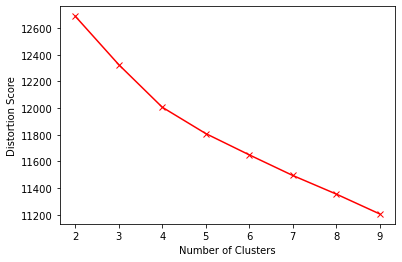

In [30]:
# Write your answer here (part2)
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
distortions = []
n_clusters = range(2,10)
for k in n_clusters:
    kmeans_model = KMeans(n_clusters=k, random_state=0)
    kmeans_model= kmeans_model.fit(PC2)
    distortions.append(sum(np.min(cdist(PC2,kmeans_model.cluster_centers_,'euclidean'), axis=1))/PC2.shape[0])
plt.plot(n_clusters, distortions, 'rx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion Score');

In [31]:
# Write your answer here (part3)
from sklearn.metrics import silhouette_samples, silhouette_score
n_clusters = range(2,8)
for k in n_clusters:
# Create the model with different number of clusters
    kmeans_model = KMeans(n_clusters=k, random_state=0).fit(PC2)
    y_kmeans = kmeans_model.predict(PC2)
    avg = silhouette_score(PC2, y_kmeans)
    print("For", k ,"clusters =", "The average silhouette score is :", avg)

For 2 clusters = The average silhouette score is : 0.10875094164479801
For 3 clusters = The average silhouette score is : 0.07412383985446072
For 4 clusters = The average silhouette score is : 0.07189241523369852
For 5 clusters = The average silhouette score is : 0.07363345527279694
For 6 clusters = The average silhouette score is : 0.04581923013169554
For 7 clusters = The average silhouette score is : 0.06026585987175542


In [32]:
# Write your answer here (part4)
KM1 = KMeans(n_clusters=2, random_state=0)
labels = KM1.fit_predict(PC2.data)
KM1.cluster_centers_.shape

(2, 200)

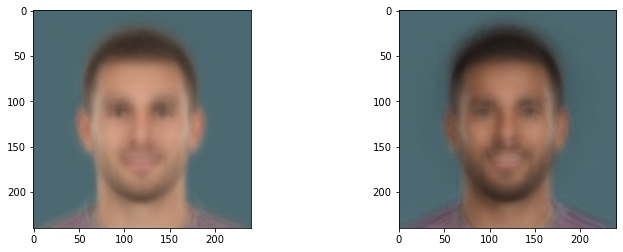

In [33]:
# Write your answer here (part5)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
for center, ax in zip(KM1.cluster_centers_, axes.ravel()):
    ax.imshow(PC1.inverse_transform(center).reshape(images[0].shape).astype(np.uint8))

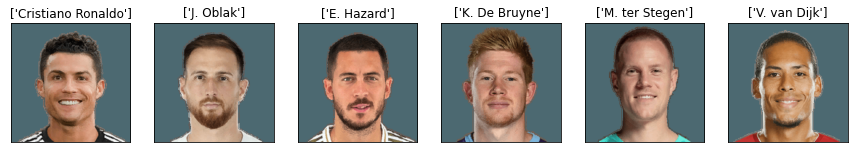

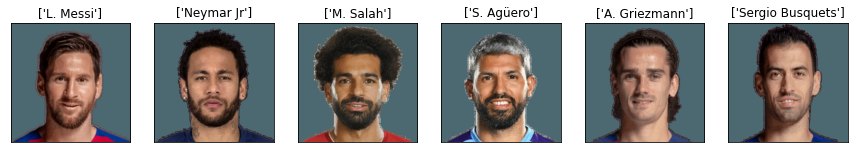

In [34]:
# Write your answer here (part6)
for i in range(KM1.n_clusters):
    mask = (labels == i)
    cluster_images = images[mask]
    cluster_target = player_names[mask]
    fig, ax = plt.subplots(1, 6, figsize=(15, 15))
    for i, axi in enumerate(ax.flat):
        axi.imshow(cluster_images[i].astype(np.uint8))
        axi.set_title([cluster_target[i]])
        axi.set(xticks=[], yticks=[])

In [35]:
# Write your answer here (part7)
print("There are two clusters.The Data is divided on basis of the color of the image.\nThe images which are darker are placed in the second cluster.\nWhile images with a lighter tone are placed in the first cluster")

There are two clusters.The Data is divided on basis of the color of the image.
The images which are darker are placed in the second cluster.
While images with a lighter tone are placed in the first cluster


<p><b>Output</b>: 
    <ul>
        <li>You need to provide answers in the designated cell for each question (don't delete the existing comments in the cells).</li>
        <li>You need to make sure that your final file contains both codes and results (don't clear the outputs).</li>
        <li>Save your file in the .ipynb format (as it is right now).</li>
        <li>Create a zip-folder and put your file in it.</li>
        <li>Upload the zip-folder into Canvas (Assignment #3)</li>
        <li>All the assignments should be submitted by <b>Mon Nov 2 at 11:59 PM</b>. No late submission will be accepted</li>
        <li>I will not accept any submission by email or any other method, so make sure that you submit the file in a right place at the right time.</li>
        </ul>
</p> 